In [1]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# from mpl_toolkits.basemap import Basemap
from sklearn.model_selection import TimeSeriesSplit
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')


In [2]:
accidents = pd.read_csv('accident.csv',index_col='accident_index')
vehicles= pd.read_csv('vehicle.csv', error_bad_lines=False,index_col='accident_index',warn_bad_lines=False)
casualties = pd.read_csv('casualty.csv', error_bad_lines=False, index_col='accident_index', warn_bad_lines=False)
print('Loaded')


Loaded


In [3]:
print("accidents")
print("size=",accidents.size)
print(accidents.shape)
accidents.head()

accidents
size= 19685365
(562439, 35)


,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
accident_index,,,,,,,,,,,,,,,,,,,,,
2017010001708,2017,10001708,532920.0,196330.0,-0.080107,51.650061,1,1,2,3,...,0,4,1,1,0,0,1,1,2,E01001450
2017010009342,2017,10009342,526790.0,181970.0,-0.173845,51.522425,1,3,2,1,...,0,4,1,2,0,0,1,1,2,E01004702
2017010009344,2017,10009344,535200.0,181260.0,-0.052969,51.514096,1,3,3,1,...,0,4,1,1,0,0,1,1,2,E01004298
2017010009348,2017,10009348,534340.0,193560.0,-0.060658,51.624832,1,3,2,1,...,4,4,2,2,0,0,1,1,2,E01001429
2017010009350,2017,10009350,533680.0,187820.0,-0.072372,51.573408,1,2,1,1,...,5,4,1,2,0,0,1,1,2,E01001808


In [4]:
print("vehicles")
print("size=",vehicles.size)
print(vehicles.shape)
vehicles.head()

vehicles
size= 27959418
(1035534, 27)


,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,junction_location,...,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type,lsoa_of_driver
accident_index,,,,,,,,,,,,,,,,,,,,,
2017010001708,2017,10001708,1,9,0,18,1,5,0,0,...,1,24,5,1997,2,1,-1,-1,-1,-1
2017010001708,2017,10001708,2,2,0,18,1,5,0,0,...,1,19,4,-1,-1,-1,-1,-1,-1,-1
2017010009342,2017,10009342,1,9,0,18,5,1,0,1,...,1,33,6,1797,8,8,-1,9,1,E01023674
2017010009342,2017,10009342,2,9,0,18,5,1,0,1,...,1,40,7,2204,2,12,-1,2,1,E01004755
2017010009344,2017,10009344,1,9,0,18,3,7,0,1,...,3,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [5]:
print("casualties")
print("size=",casualties.size)
print(casualties.shape)
casualties.head()

casualties
size= 13113738
(728541, 18)


,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty
accident_index,,,,,,,,,,,,,,,,,,
2017010001708,2017,010001708,1,1,2,2,18,4,3,0,0,1,0,0,9,1,2,E01001414
2017010001708,2017,010001708,2,2,1,1,19,4,2,0,0,0,0,0,2,-1,-1,-1
2017010001708,2017,010001708,2,3,2,1,18,4,1,0,0,0,0,0,2,-1,-1,-1
2017010009342,2017,010009342,1,1,2,2,33,6,3,0,0,1,0,0,9,1,5,E01000589
2017010009344,2017,010009344,3,1,1,2,31,6,3,0,0,0,0,0,9,1,5,E01003756


In [8]:
accidents["road_surface_conditions"].unique().shape[0]

7

In [10]:
accident_year_surface = accidents.groupby(["accident_year", "road_surface_conditions"])[["police_force", "accident_severity", "number_of_casualties"]].sum()
accident_year_surface


police_force  accident_severity  \
accident_year road_surface_conditions                                    
2017          -1                               5704                640   
               1                            2585008             259415   
               2                            1013814              91078   
               3                              15555               1226   
               4                              81560               6534   
               5                               4465                294   
               9                               2020               5051   
2018          -1                               5482                546   
               1                            2488290             252201   
               2                             881844              78337   
               3                              38985               3125   
               4                              52556               4002   
               5                               5644                374   
               9                               1442               3010   
2019          -1                               8221                873   
               1                            2271392             228684   
               2                             978930              89223   
               3                               8301                691   
               4                              42885               3290   
               5                               6711                490   
               9                               1385               3061   
2020          -1                               9380                898   
               1                            1665091             173567   
               2                             789491              72493   
               3                               6296                422   
               4                              28547               2103   
               5                               7188                505   
               9                                889               2472   
2021          -1                              12198               1229   
               1                            2008809             207654   
               2                             653628              62072   
               3                              14723               1343   
               4                              39415               3366   
               5                               5081                366   
               9                               1139               2999   

                                       number_of_casualties  
accident_year road_surface_conditions                        
2017          -1                                        253  
               1                                     121076  
               2                                      44106  
               3                                        565  
               4                                       3024  
               5                                        154  
               9                                       1815  
2018          -1                                        229  
               1                                     118062  
               2                                      37634  
               3                                       1485  
               4                                       1844  
               5                                        198  
               9                                       1145  
2019          -1                                        368  
               1                                     106548  
               2                                      42954  
               3                                        323  
               4                                       1564 

In [17]:
accidents.columns

Index(['accident_year', 'accident_reference', 'location_easting_osgr',
       'location_northing_osgr', 'longitude', 'latitude', 'police_force',
       'accident_severity', 'number_of_vehicles', 'number_of_casualties',
       'date', 'day_of_week', 'time', 'local_authority_district',
       'local_authority_ons_district', 'local_authority_highway',
       'first_road_class', 'first_road_number', 'road_type', 'speed_limit',
       'junction_detail', 'junction_control', 'second_road_class',
       'second_road_number', 'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'lsoa_of_accident_location'],
      dtype='object')

In [22]:
year_wise_casualties = accidents.groupby(['accident_year'])['number_of_casualties'].sum()
year_wise_casualties = year_wise_casualties.reset_index()
year_wise_casualties

,accident_year,number_of_casualties
0,2017,170993
1,2018,160597
2,2019,153158
3,2020,115584
4,2021,128209


In [23]:
day_week_cas = accidents.groupby(['day_of_week']).agg({'number_of_casualties':['sum']})
day_week_cas = day_week_cas.sort_values([('number_of_casualties','sum')],ascending=False)
day_week_cas

,number_of_casualties
,sum
day_of_week,
6,118672
5,108349
4,106175
3,104710
7,101849
2,101594
1,87192


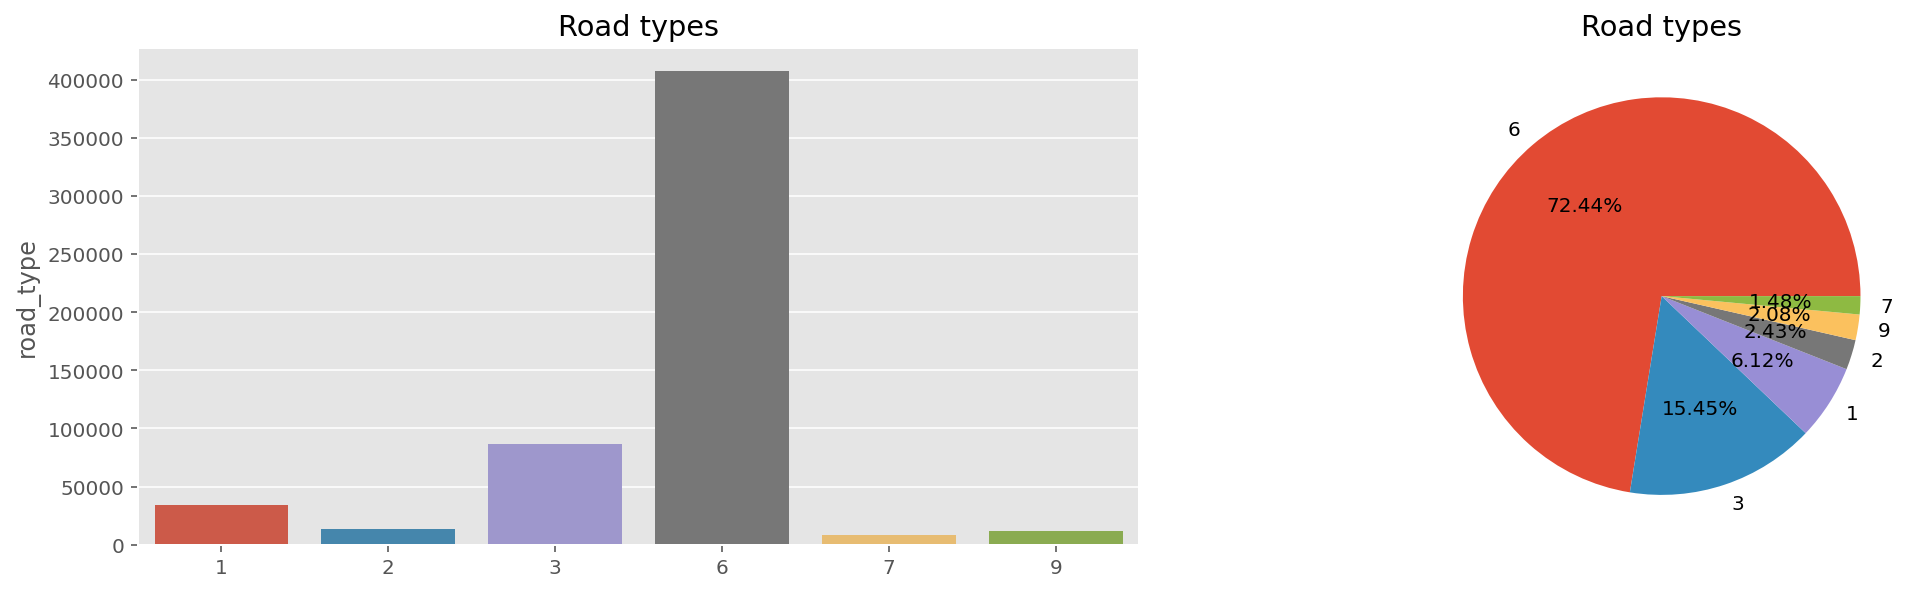

6    407437
3     86908
1     34397
2     13682
9     11700
7      8315
Name: road_type, dtype: int64

In [24]:
fig, axs = plt.subplots(nrows=1, ncols=2, constrained_layout=True, figsize=(15,4))
road = accidents["road_type"].value_counts()

sns.barplot(ax=axs[0], x = road.index, y = road)
axs[0].set_title("Road types")

axs[1].pie(road, labels=road.index, autopct='%1.2f%%')
axs[1].set_title("Road types")

plt.show()

road

In [27]:
area_wise = accidents.groupby(['local_authority_district'])['number_of_casualties'].size()
area_wise = area_wise.sort_values(ascending=False)
area_wise = area_wise.reset_index()
area_wise

,local_authority_district,number_of_casualties
0,-1,101884
1,300,9762
2,1,5746
3,204,5707
4,9,4874
...,...,...
376,915,140
377,57,134
378,941,79
379,936,62


In [28]:
district = pd.DataFrame(accidents['local_authority_district'])

In [29]:
distdict = {1:'Westminster',
2:'Camden',
3:'Islington',
4:'Hackney',
5:'Tower_Hamlets',
6:'Greenwich',
7:'Lewisham',
8:'Southwark',
9:'Lambeth',
10:'Wandsworth',
11:'Hammersmith_and_Fulham',
12:'Kensington_and_Chelsea',
13:'Waltham_Forest',
14:'Redbridge',
15:'Havering',
16:'Barking_and_Dagenham',
17:'Newham',
18:'Bexley',
19:'Bromley',
20:'Croydon',
21:'Sutton',
22:'Merton',
23:'Kingston_upon_Thames',
24:'Richmond_upon_Thames',
25:'Hounslow',
26:'Hillingdon',
27:'Ealing',
28:'Brent',
29:'Harrow',
30:'Barnet',
31:'Haringey',
32:'Enfield',
33:'Hertsmere',
38:'Epsom_and_Ewell',
40:'Spelthorne',
57:'London_Airport_(Heathrow)',
60:'Allerdale',
61:'Barrow_in_Furness',
62:'Carlisle',
63:'Copeland',
64:'Eden',
65:'South_Lakeland',
70:'Blackburn_with_Darwen',
71:'Blackpool',
72:'Burnley',
73:'Chorley',
74:'Fylde',
75:'Hyndburn',
76:'Lancaster',
77:'Pendle',
79:'Preston',
80:'Ribble_Valley',
82:'Rossendale',
83:'South_Ribble',
84:'West_Lancashire',
85:'Wyre',
90:'Knowsley',
91:'Liverpool',
92:'St._Helens',
93:'Sefton',
95:'Wirral',
100:'Bolton',
101:'Bury',
102:'Manchester',
104:'Oldham',
106:'Rochdale',
107:'Salford',
109:'Stockport',
110:'Tameside',
112:'Trafford',
114:'Wigan',
120:'Chester',
121:'Congleton',
122:'Crewe_and_Nantwich',
123:'Ellesmere_Port_and_Neston',
124:'Halton',
126:'Macclesfield',
127:'Vale_Royal',
128:'Warrington',
129:'Cheshire_East',
130:'Cheshire_West_and_Chester',
139:'Northumberland',
140:'Alnwick',
141:'Berwick_upon_Tweed',
142:'Blyth_Valley',
143:'Castle_Morpeth',
144:'Tynedale',
145:'Wansbeck',
146:'Gateshead',
147:'Newcastle_upon_Tyne',
148:'North_Tyneside',
149:'South_Tyneside',
150:'Sunderland',
160:'Chester_le_Street',
161:'Darlington',
162:'Derwentside',
163:'Durham',
164:'Easington',
165:'Sedgefield',
166:'Teesdale',
168:'Wear_Valley',
169:'County_Durham',
180:'Craven',
181:'Hambleton',
182:'Harrogate',
184:'Richmondshire',
185:'Ryedale',
186:'Scarborough',
187:'Selby',
189:'York',
200:'Bradford',
202:'Calderdale',
203:'Kirklees',
204:'Leeds',
206:'Wakefield',
210:'Barnsley',
211:'Doncaster',
213:'Rotherham',
215:'Sheffield',
228:'Kingston_upon_Hull,_City_of',
231:'East_Riding_of_Yorkshire',
232:'North_Lincolnshire',
233:'North_East_Lincolnshire',
240:'Hartlepool',
241:'Redcar_and_Cleveland',
243:'Middlesbrough',
245:'Stockton_on_Tees',
250:'Cannock_Chase',
251:'East_Staffordshire',
252:'Lichfield',
253:'Newcastle_under_Lyme',
254:'South_Staffordshire',
255:'Stafford',
256:'Staffordshire_Moorlands',
257:'Stoke_on_Trent',
258:'Tamworth',
270:'Bromsgrove',
273:'Malvern_Hills',
274:'Redditch',
276:'Worcester',
277:'Wychavon',
278:'Wyre_Forest',
279:'Bridgnorth',
280:'North_Shropshire',
281:'Oswestry',
282:'Shrewsbury_and_Atcham',
283:'South_Shropshire',
284:'Telford_and_Wrekin',
285:'Herefordshire,_County_of_',
286:'Shropshire',
290:'North_Warwickshire',
291:'Nuneaton_and_Bedworth',
292:'Rugby_',
293:'Stratford_upon_Avon',
294:'Warwick',
300:'Birmingham',
302:'Coventry',
303:'Dudley',
305:'Sandwell',
306:'Solihull',
307:'Walsall',
309:'Wolverhampton',
320:'Amber_Valley',
321:'Bolsover',
322:'Chesterfield',
            323:'Derby',
324:'Erewash',
325:'High_Peak',
327:'North_East_Derbyshire',
328:'South_Derbyshire',
329:'Derbyshire_Dales',
340:'Ashfield',
341:'Bassetlaw',
342:'Broxtowe',
343:'Gedling',
344:'Mansfield',
345:'Newark_and_Sherwood',
346:'Nottingham',
347:'Rushcliffe',
350:'Boston',
351:'East_Lindsey',
352:'Lincoln',
353:'North_Kesteven',
354:'South_Holland',
355:'South_Kesteven',
356:'West_Lindsey',
360:'Blaby',
361:'Hinckley_and_Bosworth',
362:'Charnwood',
363:'Harborough',
364:'Leicester',
365:'Melton',
366:'North_West_Leicestershire',
367:'Oadby_and_Wigston',
368:'Rutland',
380:'Corby',
381:'Daventry',
382:'East_Northamptonshire',
383:'Kettering',
384:'Northampton',
385:'South_Northamptonshire',
386:'Wellingborough',
390:'Cambridge',
391:'East_Cambridgeshire',
392:'Fenland',
393:'Huntingdonshire',
394:'Peterborough',
395:'South_Cambridgeshire',
400:'Breckland',
401:'Broadland',
402:'Great_Yarmouth',
404:'Norwich',
405:'North_Norfolk',
406:'South_Norfolk',
407:'Kings_Lynn_and_West_Norfolk',
410:'Babergh',
411:'Forest_Heath',
412:'Ipswich',
413:'Mid_Suffolk',
414:'St._Edmundsbury',
415:'Suffolk_Coastal',
416:'Waveney',
420:'Bedford',
421:'Luton',
422:'Mid_Bedfordshire',
423:'South_Bedfordshire',
424:'Central_Bedfordshire',
430:'Broxbourne',
431:'Dacorum',
432:'East_Hertfordshire',
433:'North_Hertfordshire',
434:'St._Albans',
435:'Stevenage',
436:'Three_Rivers',
437:'Watford',
438:'Welwyn_Hatfield',
450:'Basildon',
451:'Braintree',
452:'Brentwood',
453:'Castle_Point',
454:'Chelmsford',
455:'Colchester',
456:'Epping_Forest',
457:'Harlow',
458:'Maldon',
459:'Rochford',
460:'Southend_on_Sea',
461:'Tendring',
462:'Thurrock',
463:'Uttlesford',
470:'Bracknell_Forest',
471:'West_Berkshire',
472:'Reading',
473:'Slough',
474:'Windsor_and_Maidenhead',
475:'Wokingham',
476:'Aylesbury_Vale',
477:'South_Bucks',
478:'Chiltern',
479:'Milton_Keynes',
480:'Wycombe',
481:'Cherwell',
482:'Oxford',
483:'Vale_of_White_Horse',
484:'South_Oxfordshire',
485:'West_Oxfordshire',
490:'Basingstoke_and_Deane',
491:'Eastleigh',
492:'Fareham',
493:'Gosport',
494:'Hart',
495:'Havant',
496:'New_Forest',
497:'East_Hampshire',
498:'Portsmouth',
499:'Rushmoor',
500:'Southampton_',
501:'Test_Valley',
502:'Winchester',
505:'Isle_of_Wight',
510:'Elmbridge',
511:'Guildford',
512:'Mole_Valley',
513:'Reigate_and_Banstead',
514:'Runnymede',
515:'Surrey_Heath',
516:'Tandridge',
517:'Waverley',
518:'Woking',
530:'Ashford',
531:'Canterbury',
532:'Dartford',
533:'Dover',
535:'Gravesham',
536:'Maidstone',
538:'Sevenoaks',
539:'Shepway',
540:'Swale',
541:'Thanet',
542:'Tonbridge_and_Malling',
543:'Tunbridge_Wells',
544:'Medway',
551:'Eastbourne',
552:'Hastings',
554:'Lewes',
555:'Rother',
556:'Wealden',
557:'Adur',
558:'Arun',
559:'Chichester',
560:'Crawley',
562:'Horsham',
563:'Mid_Sussex',
564:'Worthing',
565:'Brighton_and_Hove',
570:'City_of_London',
580:'East_Devon',
581:'Exeter',
582:'North_Devon',
583:'Plymouth',
584:'South_Hams',
585:'Teignbridge',
586:'Mid_Devon',
587:'Torbay',
588:'Torridge',
589:'West_Devon',
590:'Caradon',
591:'Carrick',
592:'Kerrier',
593:'North_Cornwall',
594:'Penwith',
595:'Restormel',
596:'Cornwall',
601:'Bristol,_City_of',
605:'North_Somerset',
606:'Mendip',
607:'Sedgemoor',
608:'Taunton_Deane',
609:'West_Somerset',
610:'South_Somerset',
611:'Bath_and_North_East_Somerset',
612:'South_Gloucestershire',
620:'Cheltenham',
621:'Cotswold',
622:'Forest_of_Dean',
623:'Gloucester',
624:'Stroud',
625:'Tewkesbury',
630:'Kennet',
631:'North_Wiltshire',
632:'Salisbury',
633:'Swindon',
634:'West_Wiltshire',
635:'Wiltshire',
640:'Bournemouth',
641:'Christchurch',
642:'North_Dorset',
643:'Poole',
644:'Purbeck',
645:'West_Dorset',
646:'Weymouth_and_Portland',
647:'East_Dorset',
720:'Isle_of_Anglesey',
721:'Conwy',
722:'Gwynedd',
723:'Denbighshire',
724:'Flintshire',
725:'Wrexham',
730:'Blaenau_Gwent',
731:'Caerphilly',
732:'Monmouthshire',
733:'Newport',
734:'Torfaen',
740:'Bridgend',
741:'Cardiff',
742:'Merthyr_Tydfil',
743:'Neath_Port_Talbot',
744:'Rhondda,_Cynon,_Taff',
745:'Swansea',
746:'The_Vale_of_Glamorgan',
750:'Ceredigion',
751:'Carmarthenshire',
752:'Pembrokeshire',
753:'Powys',
910:'Aberdeen_City',
911:'Aberdeenshire',
912:'Angus',
913:'Argyll_and_Bute',
914:'Scottish_Borders',
915:'Clackmannanshire',
916:'West_Dunbartonshire',
917:'Dumfries_and_Galloway',
918:'Dundee_City',
919:'East_Ayrshire',
920:'East_Dunbartonshire',
921:'East_Lothian',
922:'East_Renfrewshire',
923:'Edinburgh,_City_of',
924:'Falkirk',
925:'Fife',
926:'Glasgow_City',
927:'Highland',
928:'Inverclyde',
929:'Midlothian',
930:'Moray',
931:'North_Ayrshire',
932:'North_Lanarkshire',
933:'Orkney_Islands',
934:'Perth_and_Kinross',
935:'Renfrewshire',
936:'Shetland_Islands',
937:'South_Ayrshire',
938:'South_Lanarkshire',
939:'Stirling',
940:'West_Lothian',
941:'Western_Isles'}

In [31]:
district['District_Name'] = district['local_authority_district'].copy()

In [32]:
district['District_Name'].replace(distdict, inplace=True)

In [33]:
accidents['local_authority_district'] = district['District_Name']

In [35]:
area_wise = accidents.groupby(['local_authority_district'])['number_of_casualties'].size()
area_wise = area_wise.sort_values(ascending=False)
area_wise = area_wise.reset_index()
area_wise=area_wise.head(10)
area_wise

,local_authority_district,number_of_casualties
0,-1,101884
1,Birmingham,9762
2,Westminster,5746
3,Leeds,5707
4,Lambeth,4874
5,Cornwall,4320
6,Tower_Hamlets,4281
7,Southwark,4234
8,Wandsworth,3862
9,Barnet,3833
